In [123]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pandas.plotting import register_matplotlib_converters
import itertools

In [124]:
# set datetime index
df = pd.read_csv("Sprint_Resampled Data.csv")
df['Date'] = df['Date'].apply(pd.to_datetime)
df = df.set_index('Date')
df.columns
df = df["Cushing, OK WTI Spot Price FOB (Dollars per Barrel)"]
df = df.dropna()
df = df['1991' : '2019']

In [125]:
train = df[:int(0.9*(len(df)))]
valid = df[int(0.9*(len(df))):]
order = (1,1,1)
seasonal_order = (1,0,1,12)
model = SARIMAX(train,order = order, seasonal_order=seasonal_order,trend = 'ct')
# fit model
model_fit = model.fit()
# one step forecast
# Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 5.253

/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [126]:
yhat = model_fit.predict(start=valid.index[0], end=valid.index[-1])

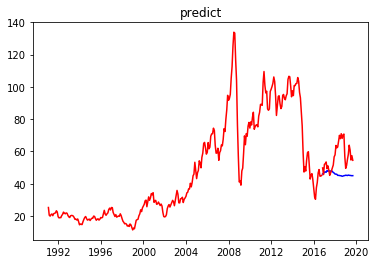

In [127]:
plt.plot(yhat, color = 'blue', label = 'yhat')
plt.plot(valid, color = 'red', label = 'valid')
plt.plot(train,color = 'red')
plt.title('predict')
plt.show()

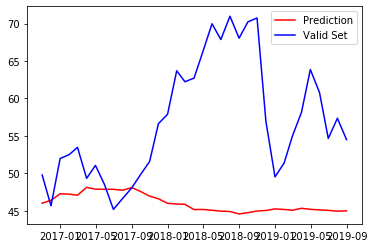

In [128]:
plt.plot(yhat, label = 'Prediction',color = "red")
plt.plot(valid, label = 'Valid Set',color= "blue")

plt.legend()
plt.show()

In [129]:
# training 
order = (1,1,1)
seasonal_order = (1,0,1,12)
model = SARIMAX(df,order = order, seasonal_order=seasonal_order,trend = 'ct')
# fit model
model_fit = model.fit()
# one step forecast
# Model[[(0, 0, 0), (1, 0, 1, 0), 'n']] 5.253

/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/home/yuntong/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [130]:
yhat = model_fit.predict(start=valid.index[0], end="2021-1")

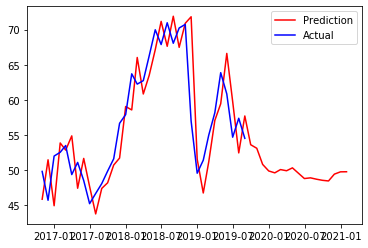

In [131]:
plt.plot(yhat,  label = "Prediction",color = "red")
plt.plot(valid, label = "Actual",color = "blue")
plt.legend()

plt.show()

In [132]:
yhat["2020"]

2020-01-31    49.573461
2020-02-29    50.039579
2020-03-31    49.872672
2020-04-30    50.283386
2020-05-31    49.507838
2020-06-30    48.760987
2020-07-31    48.860085
2020-08-31    48.664472
2020-09-30    48.508906
2020-10-31    48.416276
2020-11-30    49.389345
2020-12-31    49.716538
Freq: M, dtype: float64

In [99]:
np.mean(yhat["2020"])

49.29946213315498